In [9]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from planet.app import Planet, Geo

In [10]:
model = joblib.load('models/ensemble_model.pkl')

In [11]:
def insert_param(frame: pd.Series):
    coord = Geo(frame['place']).coord
    new_data = pd.Series({        
        'Широта': coord['latitude'],
        'Долгота': coord['longitude'],        
    })
    frame = pd.concat([frame, new_data])    
    parametrs = Planet(coord['longitude'], coord['latitude'], frame['date']).get_parametrs()
    #print(frame)
    return pd.concat([frame, pd.Series(parametrs)])

def make_frame(place: str, date: str, period: int) -> pd.DataFrame:
    frame = pd.DataFrame(
        data=pd.date_range(date, periods=period, freq="D").to_list(),
        columns=['date']
    )
    frame['place'] = place
    return frame.apply(insert_param, axis=1)

def predict_magnitude(place: str, date: str, period: int):
    frame = make_frame(place, date, period)
    frame['magnitude'] = model.predict(frame.drop(['date', 'place'], axis=1))
    return frame[['date', 'magnitude']]

In [13]:
place = 'Barnaul, Russia'
date = "2023-12-11"  # начальная дата периода
period = 35  # длительность периода  днях

magnitude_frame = predict_magnitude(place, date, period)

In [14]:
magnitude_frame

,date,magnitude
0,2023-12-11,9872.161219
1,2023-12-12,9872.795913
2,2023-12-13,9873.439669
3,2023-12-14,9874.082424
4,2023-12-15,9874.764095
5,2023-12-16,9875.441333
6,2023-12-17,9876.092258
7,2023-12-18,9876.713917
8,2023-12-19,9877.449443
9,2023-12-20,9878.072417


In [15]:
magnitude_frame.describe()

,magnitude
count,35.000000
mean,9883.313302
std,6.700340
min,9872.161219
25%,9877.760930
50%,9883.412854
75%,9888.987193
max,9894.125332


In [16]:
magnitude_frame[magnitude_frame['magnitude'] > 2.79]

,date,magnitude
0,2023-12-11,9872.161219
1,2023-12-12,9872.795913
2,2023-12-13,9873.439669
3,2023-12-14,9874.082424
4,2023-12-15,9874.764095
5,2023-12-16,9875.441333
6,2023-12-17,9876.092258
7,2023-12-18,9876.713917
8,2023-12-19,9877.449443
9,2023-12-20,9878.072417


<BarContainer object of 35 artists>

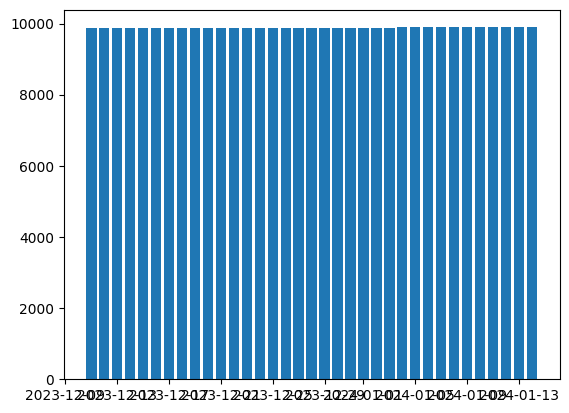

In [17]:
plt.bar(magnitude_frame['date'], magnitude_frame['magnitude'])